<a href="https://colab.research.google.com/github/DeenoBajithaCode/LangGraph/blob/main/simple_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing LangGraph

This command installs the `langgraph` library, which allows us to build and simulate graph-based workflows in Python.


In [ ]:
!pip install langgraph -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 7.5 MB/s eta 0:00:00


##Simple Graph (single inputs)

In [ ]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

# Step 1: Define state type

In [ ]:
class ReverseState(TypedDict):
    text: str
    reversed_text: str

# Step 2: Define a node (function) for reversing text

In [ ]:
def reverse_text_node(state: ReverseState) -> ReverseState:
    reversed_text = state["text"][::-1]
    return {"text": state["text"], "reversed_text": reversed_text}

# Step 3: Build the graph

In [ ]:
graph = StateGraph(ReverseState)
graph.add_node("reverse", reverse_text_node)
graph.set_entry_point("reverse")
graph.set_finish_point("reverse")
app = graph.compile()

# Step 4: Visualize the graph

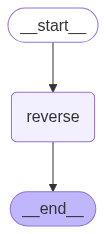

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

# Step 4: Run the graph

In [ ]:
input_state = {"text": "LangGraph is fun!", "reversed_text": ""}
final_state = app.invoke(input_state)

#Results

In [ ]:
print("Reversed Text:", final_state["reversed_text"])

Reversed Text: !nuf si hparGgnaL


##Simple Graph (Multi inputs)

#Step 1:  Define a simple state

In [ ]:
class SimpleState(TypedDict):
    text1: str
    text2: str
    result: str

# Step 2: One node that does everything

In [ ]:
def reverse_and_combine(state: SimpleState) -> SimpleState:
    rev1 = state["text1"][::-1]
    rev2 = state["text2"][::-1]
    return {
        "text1": state["text1"],
        "text2": state["text2"],
        "result": rev1 + " | " + rev2
    }


# Step 3: Build simple graph

In [ ]:
graph = StateGraph(SimpleState)
graph.add_node("reverse_and_combine", reverse_and_combine)

# Step 4: Entry and finish points are the same

In [ ]:
graph.set_entry_point("reverse_and_combine")
graph.set_finish_point("reverse_and_combine")
app = graph.compile()

# Step 5: Visualize the graph

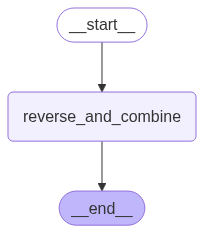

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

# Step 6: run

In [ ]:
state = {
    "text1": "LangGraph",
    "text2": "rocks!",
    "result": ""
}
final = app.invoke(state)

# Results

In [ ]:
print("Result:", final["result"])

Result: hparGgnaL | !skcor
